In [1]:
pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\ACER\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [3]:
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('datasets//Family Income and Expenditure.csv')

In [5]:
df

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41539,119773,XII - SOCCSKSARGEN,44875,Enterpreneurial Activities,1,23675,21542,1476,6120,1632,...,0,0,0,0,0,1,0,0,0,0
41540,137320,XII - SOCCSKSARGEN,31157,Enterpreneurial Activities,1,2691,1273,1886,4386,1840,...,0,0,0,0,0,3,0,0,0,0
41541,133171,XII - SOCCSKSARGEN,45882,Enterpreneurial Activities,2,28646,27339,480,4796,1232,...,0,0,0,0,0,1,0,0,0,0
41542,129500,XII - SOCCSKSARGEN,81416,Enterpreneurial Activities,1,29996,26655,2359,17730,2923,...,0,0,0,0,0,2,0,0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Data columns (total 60 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Total Household Income                         41544 non-null  int64 
 1   Region                                         41544 non-null  object
 2   Total Food Expenditure                         41544 non-null  int64 
 3   Main Source of Income                          41544 non-null  object
 4   Agricultural Household indicator               41544 non-null  int64 
 5   Bread and Cereals Expenditure                  41544 non-null  int64 
 6   Total Rice Expenditure                         41544 non-null  int64 
 7   Meat Expenditure                               41544 non-null  int64 
 8   Total Fish and  marine products Expenditure    41544 non-null  int64 
 9   Fruit Expenditure                              41544 non-null

In [7]:
df.dtypes

Total Household Income                            int64
Region                                           object
Total Food Expenditure                            int64
Main Source of Income                            object
Agricultural Household indicator                  int64
Bread and Cereals Expenditure                     int64
Total Rice Expenditure                            int64
Meat Expenditure                                  int64
Total Fish and  marine products Expenditure       int64
Fruit Expenditure                                 int64
Vegetables Expenditure                            int64
Restaurant and hotels Expenditure                 int64
Alcoholic Beverages Expenditure                   int64
Tobacco Expenditure                               int64
Clothing, Footwear and Other Wear Expenditure     int64
Housing and water Expenditure                     int64
Imputed House Rental Value                        int64
Medical Care Expenditure                        

In [8]:
df.isnull().sum()

Total Household Income                              0
Region                                              0
Total Food Expenditure                              0
Main Source of Income                               0
Agricultural Household indicator                    0
Bread and Cereals Expenditure                       0
Total Rice Expenditure                              0
Meat Expenditure                                    0
Total Fish and  marine products Expenditure         0
Fruit Expenditure                                   0
Vegetables Expenditure                              0
Restaurant and hotels Expenditure                   0
Alcoholic Beverages Expenditure                     0
Tobacco Expenditure                                 0
Clothing, Footwear and Other Wear Expenditure       0
Housing and water Expenditure                       0
Imputed House Rental Value                          0
Medical Care Expenditure                            0
Transportation Expenditure  

<h1 style="background-color: #808080; padding: 10px; border-radius: 15px; color: white;">Question 1.</h1>
<h2 style="background-color: #808080; padding: 10px; border-radius: 15px; color: white;">Which region has the highest average household income?</h2>


In [9]:
ave = df.groupby('Region')['Total Household Income'].mean().sort_values(ascending=False)
ave

Region
NCR                          420861.861501
IVA - CALABARZON             303360.536040
III - Central Luzon          292965.181650
CAR                          269540.484638
XI - Davao Region            238115.891251
I - Ilocos Region            238110.084327
II - Cagayan Valley          236778.221721
VII - Central Visayas        234909.314050
VI - Western Visayas         220481.260260
IVB - MIMAROPA               216685.124900
X - Northern Mindanao        214057.779544
Caraga                       196907.376543
VIII - Eastern Visayas       196736.581087
IX - Zasmboanga Peninsula    191000.908277
V - Bicol Region             186105.492718
XII - SOCCSKSARGEN           182984.802545
 ARMM                        134746.817616
Name: Total Household Income, dtype: float64

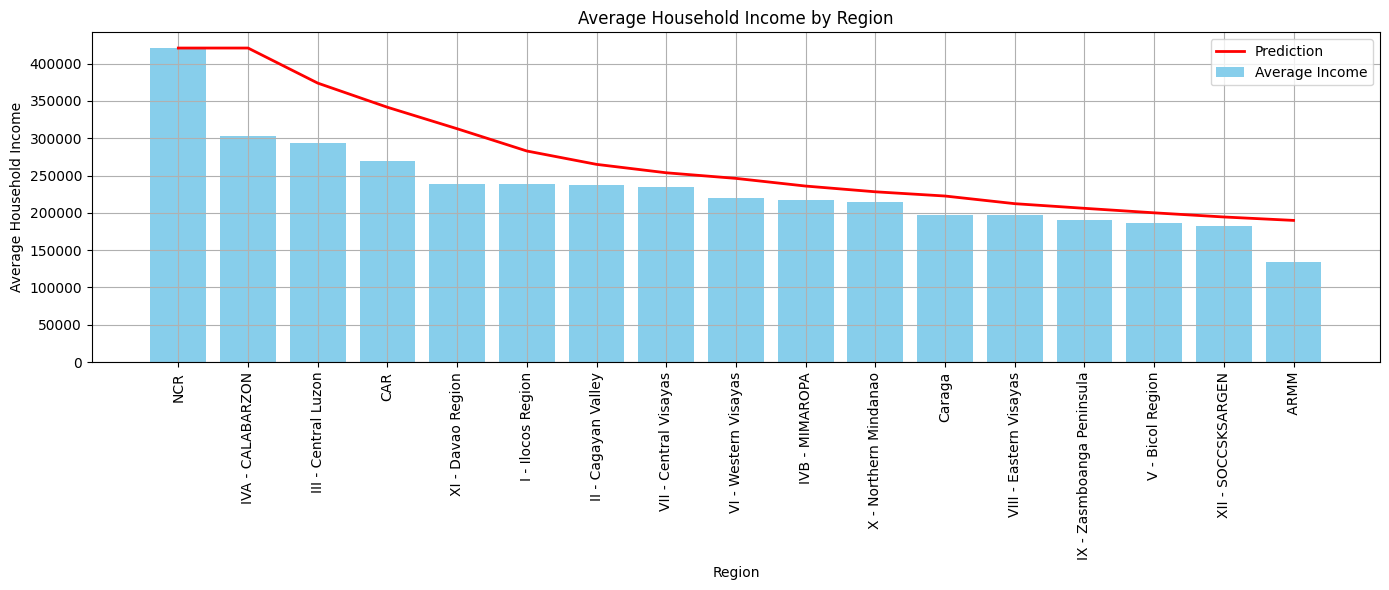

In [14]:

df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_").str.replace("__", "_")

# Group and sort average income by region
ave_income_by_region = df.groupby('region')['total_household_income'].mean().sort_values(ascending=False)

# Convert values to a series for SES
income_series = ave_income_by_region.values

# Apply Simple Exponential Smoothing
ses_model = SimpleExpSmoothing(income_series)
fitted_model = ses_model.fit(smoothing_level=0.4, optimized=False)
smoothed_income = fitted_model.fittedvalues

# Plotting
plt.figure(figsize=(14, 6))
plt.bar(ave_income_by_region.index, income_series, color='skyblue', label='Average Income')
plt.plot(ave_income_by_region.index, smoothed_income, color='red', linewidth=2, label='Prediction')
plt.xticks(rotation=90)
plt.title('Average Household Income by Region')
plt.xlabel('Region')
plt.ylabel('Average Household Income')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<h1 style="background-color: #808080; padding: 10px; border-radius: 15px; color: white;">Insight 1.</h1>
<h2>The region with the highest average household income has more financial capacity and may also show higher food and luxury expenditures.</h2>

<h1 style="background-color: #808080; padding: 10px; border-radius: 15px; color: white;">Insight 1.1</h1>
<h1 style="background-color: #808080; padding: 10px; border-radius: 15px; color: white;">Regions with lower average household income may benefit from targeted social programs, like livelihood support, food assistance, or infrastructure development.</h1>

In [11]:
print(df.columns)

Index(['total_household_income', 'region', 'total_food_expenditure',
       'main_source_of_income', 'agricultural_household_indicator',
       'bread_and_cereals_expenditure', 'total_rice_expenditure',
       'meat_expenditure', 'total_fish_and_marine_products_expenditure',
       'fruit_expenditure', 'vegetables_expenditure',
       'restaurant_and_hotels_expenditure', 'alcoholic_beverages_expenditure',
       'tobacco_expenditure', 'clothing,_footwear_and_other_wear_expenditure',
       'housing_and_water_expenditure', 'imputed_house_rental_value',
       'medical_care_expenditure', 'transportation_expenditure',
       'communication_expenditure', 'education_expenditure',
       'miscellaneous_goods_and_services_expenditure',
       'special_occasions_expenditure', 'crop_farming_and_gardening_expenses',
       'total_income_from_entrepreneurial_acitivites', 'household_head_sex',
       'household_head_age', 'household_head_marital_status',
       'household_head_highest_grade_comple

In [12]:
print(df.columns.tolist())

['total_household_income', 'region', 'total_food_expenditure', 'main_source_of_income', 'agricultural_household_indicator', 'bread_and_cereals_expenditure', 'total_rice_expenditure', 'meat_expenditure', 'total_fish_and_marine_products_expenditure', 'fruit_expenditure', 'vegetables_expenditure', 'restaurant_and_hotels_expenditure', 'alcoholic_beverages_expenditure', 'tobacco_expenditure', 'clothing,_footwear_and_other_wear_expenditure', 'housing_and_water_expenditure', 'imputed_house_rental_value', 'medical_care_expenditure', 'transportation_expenditure', 'communication_expenditure', 'education_expenditure', 'miscellaneous_goods_and_services_expenditure', 'special_occasions_expenditure', 'crop_farming_and_gardening_expenses', 'total_income_from_entrepreneurial_acitivites', 'household_head_sex', 'household_head_age', 'household_head_marital_status', 'household_head_highest_grade_completed', 'household_head_job_or_business_indicator', 'household_head_occupation', 'household_head_class_of_

<h1>Question 2.</h1>
<h2>Can household ownership of vehicles predict transportation expenditure trends?</h2>

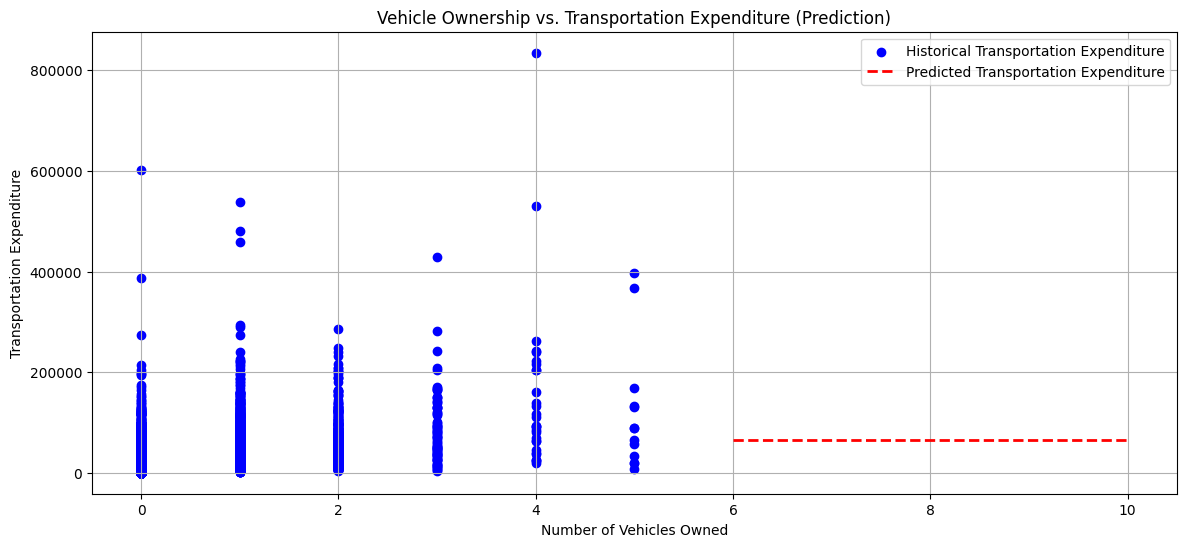

In [17]:
# Sort data by number of cars, jeeps, vans owned
df_sorted = df.sort_values(by="number_of_car,_jeep,_van")

# Extract transportation expenditure values
transport_exp_series = df_sorted["transportation_expenditure"].values

# Apply Simple Exponential Smoothing
ses_model_transport = SimpleExpSmoothing(transport_exp_series)
fitted_model_transport = ses_model_transport.fit(smoothing_level=0.4, optimized=False)
predicted_transport_exp = fitted_model_transport.forecast(steps=5)  # Predict next few ownership levels

# Plot results
plt.figure(figsize=(14, 6))
plt.scatter(df_sorted["number_of_car,_jeep,_van"], transport_exp_series, color='blue', label='Historical Transportation Expenditure')
plt.plot(range(df_sorted["number_of_car,_jeep,_van"].max()+1, df_sorted["number_of_car,_jeep,_van"].max()+6), predicted_transport_exp,
         color='red', linewidth=2, linestyle='dashed', label='Predicted Transportation Expenditure')
plt.xlabel("Number of Vehicles Owned")
plt.ylabel("Transportation Expenditure")
plt.title("Vehicle Ownership vs. Transportation Expenditure (Prediction)")
plt.legend()
plt.grid(True)
plt.show()


<h1>Insight 2.</h1>
<h2>Households that own more vehicles tend to have higher transportation expenses, likely due to fuel, maintenance, and insurance costs.</h2>

<h1>Insight 2.1</h1>
<h2>The SES model predicts that transportation expenditure will continue rising with more vehicle ownership, reinforcing the financial responsibility associated with personal transportation.</h2>

<h1>Question 3.</h1>
<h2>Does the number of bedrooms in a household affect housing and water expenditures?</h2>

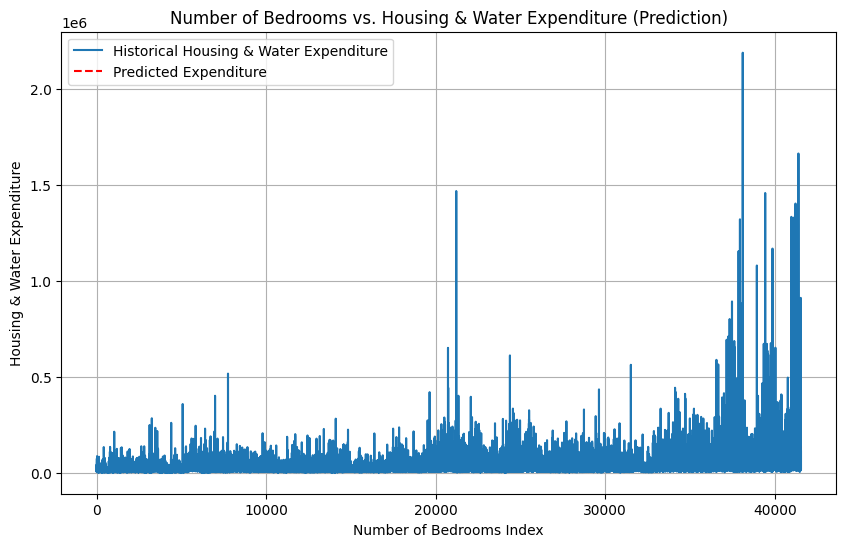

In [19]:
# Sort data by number of bedrooms
df_sorted = df.sort_values(by="number_of_bedrooms")

# Extract housing and water expenditure values
housing_exp_series = df_sorted["housing_and_water_expenditure"].reset_index(drop=True)

# Apply Simple Exponential Smoothing
ses_model_housing = ExponentialSmoothing(housing_exp_series, trend='add', seasonal=None)
fitted_model_housing = ses_model_housing.fit()
forecast_housing = fitted_model_housing.forecast(steps=3)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(housing_exp_series, label='Historical Housing & Water Expenditure')
plt.plot(range(len(housing_exp_series), len(housing_exp_series)+3), forecast_housing, label='Predicted Expenditure', linestyle='dashed', color='red')
plt.xlabel("Number of Bedrooms Index")
plt.ylabel("Housing & Water Expenditure")
plt.title("Number of Bedrooms vs. Housing & Water Expenditure (Prediction)")
plt.legend()
plt.grid(True)
plt.show()


<h1>Inisght 3.</h1>
<h2>Households with more bedrooms tend to have higher housing and water expenditures, likely due to larger spaces requiring more maintenance and utilities.</h2>

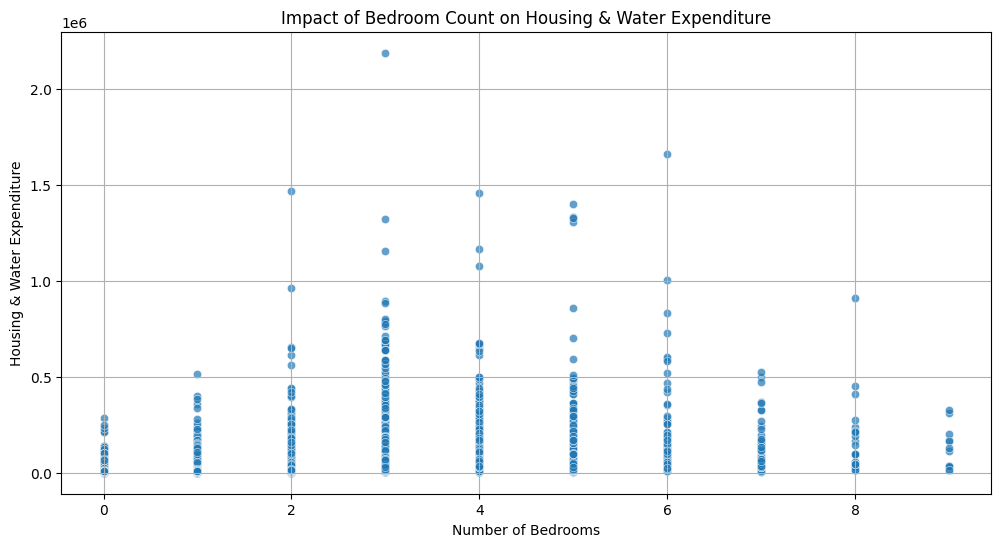

In [20]:
# Plot a scatter plot to visualize the relationship between number of bedrooms and housing expenditures
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df["number_of_bedrooms"], y=df["housing_and_water_expenditure"], alpha=0.7)
plt.xlabel("Number of Bedrooms")
plt.ylabel("Housing & Water Expenditure")
plt.title("Impact of Bedroom Count on Housing & Water Expenditure")
plt.grid(True)
plt.show()


<h1>Insight 3.1</h1>
<h2>Predicted expenditure trends show that as the number of bedrooms increases, overall housing costs follow suit, reinforcing the financial considerations of larger homes.</h2>

<h1 style="background-color: #00BCD4; padding: 10px; border-radius: 15px; color: white;">Question 4.</h1>
<h2 style="background-color: #00BCD4; padding: 10px; border-radius: 15px; color: white;">Does household technology ownership impact education spending?</h2>

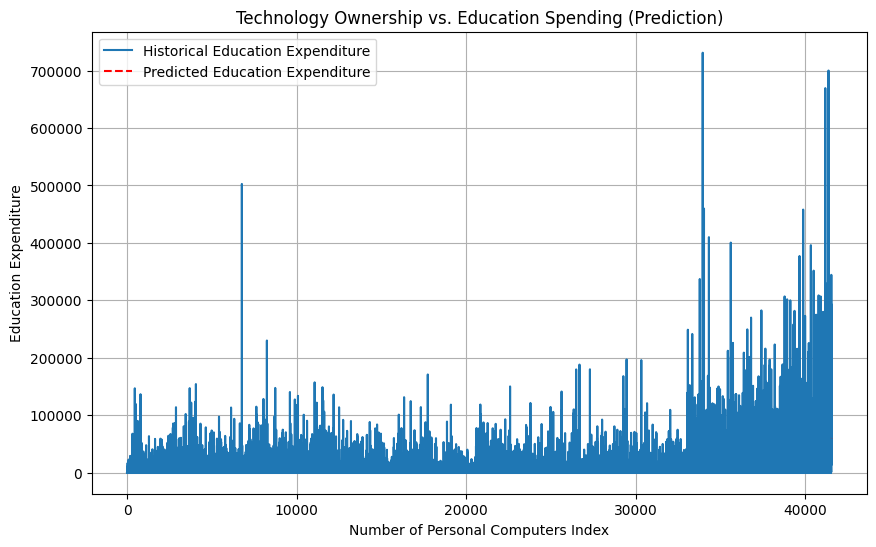

In [21]:
# Sort data by number of personal computers owned
df_sorted = df.sort_values(by="number_of_personal_computer")

# Extract education expenditure values
education_exp_series = df_sorted["education_expenditure"].reset_index(drop=True)

# Apply Simple Exponential Smoothing
ses_model_edu = ExponentialSmoothing(education_exp_series, trend='add', seasonal=None)
fitted_model_edu = ses_model_edu.fit()
forecast_education_exp = fitted_model_edu.forecast(steps=5)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(education_exp_series, label='Historical Education Expenditure')
plt.plot(range(len(education_exp_series), len(education_exp_series)+5), forecast_education_exp, label='Predicted Education Expenditure', linestyle='dashed', color='red')
plt.xlabel("Number of Personal Computers Index")
plt.ylabel("Education Expenditure")
plt.title("Technology Ownership vs. Education Spending (Prediction)")
plt.legend()
plt.grid(True)
plt.show()


<h1 style="background-color: #00BCD4; padding: 10px; border-radius: 15px; color: white;">Insight 4.</h1>
<h2 style="background-color: #00BCD4; padding: 10px; border-radius: 15px; color: white;">Households with more personal computers tend to allocate higher spending on education, possibly due to increased access to online learning and digital resources.</h2>


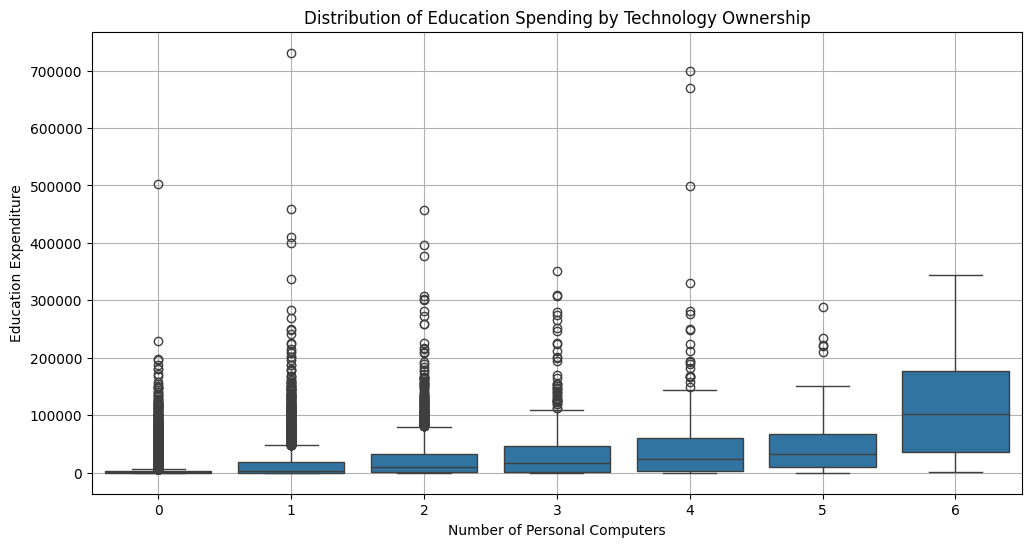

In [23]:

plt.figure(figsize=(12, 6))
sns.boxplot(x=df["number_of_personal_computer"], y=df["education_expenditure"])
plt.xlabel("Number of Personal Computers")
plt.ylabel("Education Expenditure")
plt.title("Distribution of Education Spending by Technology Ownership")
plt.grid(True)
plt.show()


<h1 style="background-color: #00BCD4; padding: 10px; border-radius: 15px; color: white;">Inisght 4.1</h1>
<h2 style="background-color: #00BCD4; padding: 10px; border-radius: 15px; color: white;">The impact of digital literacy on financial planning is further supported by anticipated trends that show ongoing investment in education for households with technology.</h2>

<h1>Question 5.</h1>
<h1><h1>Is there a trend between the number of employed family members and total household income?</h1>

In [ ]:

x = df['total_number_of_family_members_employed']
y = df['total_household_income']

smoothed = lowess(y, x, frac=0.3)

plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.3, label='Raw Data', color='gray')
plt.plot(smoothed[:, 0], smoothed[:, 1], color='red', linewidth=2, label='Prediction')
plt.title('Employed Family Members vs Total Household Income')
plt.xlabel('Number of Employed Family Members')
plt.ylabel('Total Household Income')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<h1 style="background-color: #D84040; padding: 10px; border-radius: 15px; color: white;">Insight 5.</h1>
<h1 style="background-color: #D84040; padding: 10px; border-radius: 15px; color: white;">Household income generally increases with the number of employed family members but there are diminishing returns beyond a certain point.</h1>

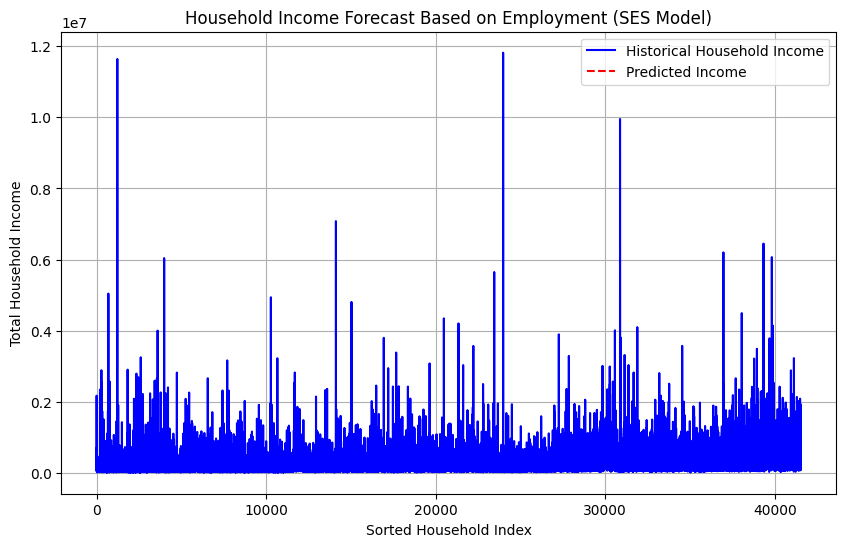

In [25]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Sort data based on the number of employed family members
df_sorted = df.sort_values(by='total_number_of_family_members_employed')

# Extract household income values
income_series = df_sorted['total_household_income'].reset_index(drop=True)

# Apply Simple Exponential Smoothing
ses_model_income = SimpleExpSmoothing(income_series)
fitted_model_income = ses_model_income.fit(smoothing_level=0.5, optimized=False)
forecast_income = fitted_model_income.forecast(steps=5)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(income_series, label='Historical Household Income', color='blue')
plt.plot(range(len(income_series), len(income_series)+5), forecast_income, linestyle='dashed', color='red', label='Predicted Income')
plt.xlabel("Sorted Household Index")
plt.ylabel("Total Household Income")
plt.title("Household Income Forecast Based on Employment (SES Model)")
plt.legend()
plt.grid(True)
plt.show()


<h1 style="background-color: #D84040; padding: 10px; border-radius: 15px; color: white;">Insight 5.1</h1>
<h2 style="background-color: #D84040; padding: 10px; border-radius: 15px; color: white;">This suggests that multi-earner households fare better economically, but the quality of employment may matter more than sheer quantity.</h2>

<h1 style="background-color: #4CAF50; padding: 10px; border-radius: 15px; color: white;">Question 6.</h1>
<h2 style="background-color: #4CAF50; padding: 10px; border-radius: 15px; color: white;">How does the number of motorized vehicles, including car, jeep, and van, relate to total household income?</h2>

In [ ]:


# Drop rows with missing values
car_df = df.dropna(subset=['number_of_car,_jeep,_van', 'total_household_income'])

# Prepare data
x = car_df['number_of_car,_jeep,_van']
y = car_df['total_household_income']

# Apply LOWESS smoothing
smoothed = lowess(y, x, frac=0.3)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.3, color='darkgreen', label='Raw Data')
plt.plot(smoothed[:, 0], smoothed[:, 1], color='red', linewidth=2, label='Prediction')
plt.title('Car/Jeep/Van Ownership vs Total Household Income')
plt.xlabel('Number of Car/Jeep/Van Owned')
plt.ylabel('Total Household Income')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


<h1 style="background-color: #4CAF50; padding: 10px; border-radius: 15px; color: white;">Insight 6.</h1>
<h2 style="background-color: #4CAF50; padding: 10px; border-radius: 15px; color: white;">Ownership of motorized vehicles strongly correlates with higher household income, reinforcing their role as luxury or productivity assets.</h2>

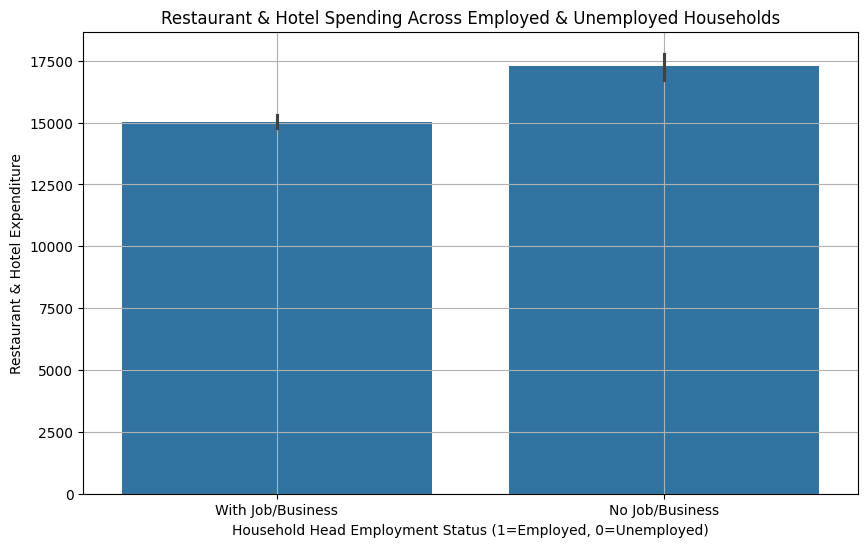

In [24]:
# Countplot showing expenditure differences across employment statuses
plt.figure(figsize=(10, 6))
sns.barplot(x=df["household_head_job_or_business_indicator"], y=df["restaurant_and_hotels_expenditure"])
plt.xlabel("Household Head Employment Status (1=Employed, 0=Unemployed)")
plt.ylabel("Restaurant & Hotel Expenditure")
plt.title("Restaurant & Hotel Spending Across Employed & Unemployed Households")
plt.grid(True)
plt.show()


<h1 style="background-color: #4CAF50; padding: 10px; border-radius: 15px; color: white;">Insight 6.1</h1>
<h2 style="background-color: #4CAF50; padding: 10px; border-radius: 15px; color: white;">Most households with no vehicles cluster around lower income, highlighting vehicle ownership as a potential indicator of wealth and mobility.</h2>

In [ ]:
df.dtypes

<h1>Question 7.</h1>
<h2>Does owning more personal computers correlate with higher total household income?</h2>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
import warnings

warnings.filterwarnings("ignore")

# Sort the data by number of personal computers
pc_df = df.dropna(subset=['number_of_personal_computer', 'total_household_income'])
pc_df = pc_df.sort_values(by='number_of_personal_computer')

# Use income as the series to be smoothed
income_series = pc_df['total_household_income'].reset_index(drop=True)

# Apply Simple Exponential Smoothing
ses_model = SimpleExpSmoothing(income_series)
fitted_model = ses_model.fit(smoothing_level=0.2, optimized=False)
smoothed_income = fitted_model.fittedvalues

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(income_series, label='Original Income', alpha=0.3, color='purple')
plt.plot(smoothed_income, label='Income Prediction', color='orange')
plt.title('Smoothed Household Income by Number of Personal Computers (Ordered)')
plt.xlabel('Households Ordered by Number of PCs')
plt.ylabel('Total Household Income')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<h1>Insight 7.</h1>
<h2>The SES curve clearly shows an upward trend, which confirms that households with more personal computers tend to have significantly higher incomes.</h2>

<h1>Insight 7.1</h1>
<h2>Fluctuations in raw data are reduced, helping visualize the broader pattern of income increase related to digital device ownership, even if not strictly time-based.</h2>

<h1>Question 8.</h1>
<h2>How does total household income relate to food expenditure, and what can we predict about future household income?</h2>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
import numpy as np

# Use only the necessary columns
df_subset = df[['total_household_income', 'total_food_expenditure']].copy()

# Scatterplot to show the relationship between income and food spending
plt.figure(figsize=(8, 5))
plt.scatter(df_subset['total_household_income'], df_subset['total_food_expenditure'], alpha=0.5)
plt.xlabel('Total Household Income')
plt.ylabel('Total Food Expenditure')
plt.title('Income vs Food Expenditure')
plt.grid(True)
plt.show()

# Simulate a monthly income trend by sorting and assigning fake monthly dates
df_sorted = df_subset.sort_values('total_household_income').reset_index(drop=True)
df_sorted['Date'] = pd.date_range(start='2020-01-01', periods=len(df_sorted), freq='M')
df_sorted.set_index('Date', inplace=True)

# Resample to monthly averages (optional, depends on data density)
monthly_income = df_sorted['total_household_income'].resample('M').mean()

# Apply Simple Exponential Smoothing
model = SimpleExpSmoothing(monthly_income, initialization_method='estimated')
fit = model.fit(smoothing_level=0.2, optimized=False)

# Forecast next 12 months
forecast = fit.forecast(12)

# Plot actual vs forecast
plt.figure(figsize=(10, 6))
plt.plot(monthly_income, label='Actual Monthly Income')
plt.plot(fit.fittedvalues, label='Smoothed Income')
plt.plot(forecast, label='Forecast (Next 12 Months)', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Household Income')
plt.title('Household Income Trend and Forecast')
plt.legend()
plt.grid(True)
plt.show()


<h1>Insight 8.</h1>
<h2>Higher household income generally corresponds to higher food expenditure, but the proportion spent on food may vary by income level.</h2>

<h1>Insight 8.1</h1>
<h2>It can predict the next 12 months of household income, helping understand future economic behavior based on past values.</h2>

In [ ]:
df.dtypes

<h1>Question 9.</h1>
<h2>What is the trend of household income across the sample, and how can we model its future progression?</h2>

In [ ]:

income_series = df.sort_values(by='total_household_income')['total_household_income'].reset_index(drop=True)

split_index = int(len(income_series) * 0.8)
train_income = income_series[:split_index]
test_income = income_series[split_index:]


model = ExponentialSmoothing(train_income, trend='add', seasonal=None)
fit = model.fit()
forecast = fit.forecast(len(test_income))

# Plot
plt.figure(figsize=(10, 6))
plt.plot(train_income, label='Train')
plt.plot(test_income.index, test_income, label='Test')
plt.plot(test_income.index, forecast, label='Forecast', color='red')
plt.title('Projected Trend of Household Income')
plt.xlabel('Index')
plt.ylabel('Total Household Income')
plt.legend()
plt.grid(True)
plt.show()


<h1>Insight 9.</h1>
<h2> The Household income shows a generally increasing trend, indicating positive economic growth patterns.</h2>

<h1>Insight 9.1</h1>
<h2>The model projects continued increases, useful for anticipating future income-related demands.</h2>

<h1>Question 10.</h1>
<h2>How accurately does an additive trend-based model predict future food expenditure patterns, and what factors could impact the reliability of this forecast?</h2>

In [ ]:

food_series = df.sort_values(by='total_food_expenditure')['total_food_expenditure'].reset_index(drop=True)

# Split into train and test
split = int(len(food_series) * 0.8)
train_food = food_series[:split]
test_food = food_series[split:]

# Forecast using trend-based model
model = ExponentialSmoothing(train_food, trend='add', seasonal=None)
fit = model.fit()
forecast = fit.forecast(len(test_food))

# Plot
plt.figure(figsize=(10, 6))
plt.plot(train_food, label='Train')
plt.plot(test_food.index, test_food, label='Test')
plt.plot(test_food.index, forecast, label='Forecast', color='red')
plt.title('Projected Trend of Food Expenditure')
plt.xlabel('Index')
plt.ylabel('Total Food Expenditure')
plt.legend()
plt.grid(True)
plt.show()


<h1>Insight 10.</h1>
<h2>Food expenditure appears to rise steadily, consistent with increasing household income and population needs.</h2>

<h1>Insight 10.1</h1>
<h2>The projected values suggest moderate growth in spending, which can help in budget or resource planning.</h2>

In [16]:
df.dtypes

total_household_income                            int64
region                                           object
total_food_expenditure                            int64
main_source_of_income                            object
agricultural_household_indicator                  int64
bread_and_cereals_expenditure                     int64
total_rice_expenditure                            int64
meat_expenditure                                  int64
total_fish_and_marine_products_expenditure        int64
fruit_expenditure                                 int64
vegetables_expenditure                            int64
restaurant_and_hotels_expenditure                 int64
alcoholic_beverages_expenditure                   int64
tobacco_expenditure                               int64
clothing,_footwear_and_other_wear_expenditure     int64
housing_and_water_expenditure                     int64
imputed_house_rental_value                        int64
medical_care_expenditure                        

<h1></h1>

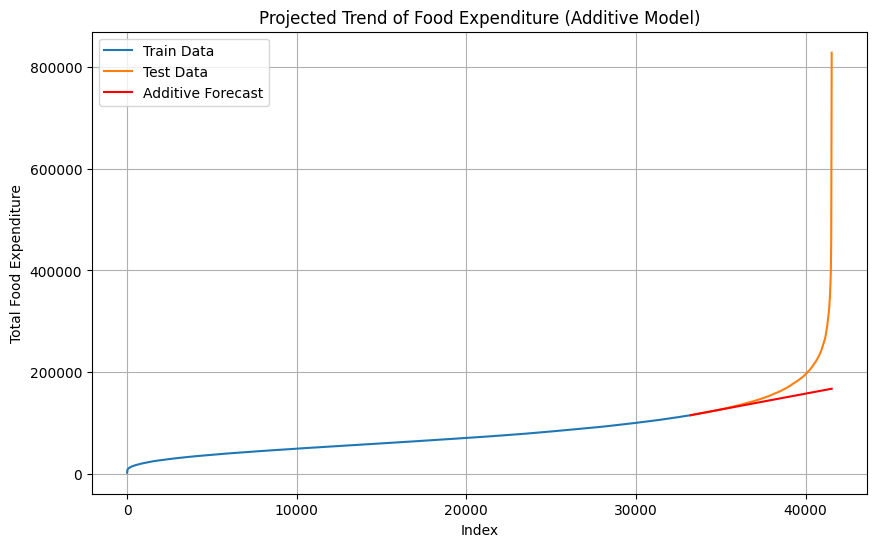

In [18]:

food_series = df.sort_values(by='total_food_expenditure')['total_food_expenditure'].reset_index(drop=True)


split = int(len(food_series) * 0.8)
train_food = food_series[:split]
test_food = food_series[split:]

# Forecast using additive trend-based model
model_add = ExponentialSmoothing(train_food, trend='add', seasonal=None)
fit_add = model_add.fit()
forecast_add = fit_add.forecast(len(test_food))

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(train_food, label='Train Data')
plt.plot(test_food.index, test_food, label='Test Data')
plt.plot(test_food.index, forecast_add, label='Additive Forecast', color='red')
plt.title('Projected Trend of Food Expenditure (Additive Model)')
plt.xlabel('Index')
plt.ylabel('Total Food Expenditure')
plt.legend()
plt.grid(True)
plt.show()
